<div style="background-color: lightgreen; border-radius: 5px; padding: 10px;">
    <h4>Topic Modeling</h4>
    <p>...</p>
</div>

In [1]:
import os
import pandas as pd
import numpy as np
from ast import literal_eval
from tqdm.notebook import tqdm

from preprocessing_functions import *
from topic_modeling_functions import *

import warnings
warnings.filterwarnings('ignore')

# Train_lda_model
from gensim.models.wrappers import LdaMallet

# Calculate_coherence_score
from gensim.models import CoherenceModel

# Saving and visualising lda models
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

C:\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\venv_citynet3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# Variables

In [47]:
files_dir = '../../../../data_clean/paragraphs_lemmatised/'
POS = ["NOUN", "VERB", "ADJ"]




ONLY_ENGLISH_WORDS = True
merged_POS = True
saving = True

# Don't change!
word_type = 'english_words' if ONLY_ENGLISH_WORDS else 'dirty_words'
files_output_dir = f"{files_dir}/{word_type}_merged_{''.join(POS)}"

In [47]:
os.makedirs(f"{files_dir}/merged_{''.join(POS)}", exist_ok=True)

### Merge POS (Should be removed to pre-processing notebook!)

In [72]:
# for file in os.listdir()
for file in os.listdir(files_dir)[:]:
    if file.endswith(".csv"):
        
        output_fp = os.path.join(files_output_dir, file.replace('preprocessed', 'merged_POS'))
        
        if os.path.isfile(output_fp):
            print(f"{output_fp} already exists.")
            continue
            
        fp = os.path.join(files_dir, file)
        temp_df = pd.read_csv(fp)

        if merged_POS:
            os.makedirs(files_output_dir, exist_ok=True)
            temp_df['merged_POS'] = [[] for _ in range(temp_df.shape[0])]

        for tag in POS:
            if ONLY_ENGLISH_WORDS:
                        column_name = f'{tag}_clean'   
            else:
                column_name = f'{tag}'

            string_to_list = temp_df[column_name].apply(literal_eval)

            if merged_POS:
                temp_df['merged_POS'] += string_to_list
        
        # Save df
        temp_df = temp_df[['city_1', 'city_2', 'paragraph_id', 'paragraph', 'article_id', 'title', 'merged_POS']]
        temp_df.to_csv(output_fp, index=False)

../../../../data_clean/paragraphs_lemmatised//english_words_merged_NOUNVERBADJ\paragraphs_10_934384_1038204_merged_POS.csv already exists.
../../../../data_clean/paragraphs_lemmatised//english_words_merged_NOUNVERBADJ\paragraphs_11_1038204_1142024_merged_POS.csv already exists.
../../../../data_clean/paragraphs_lemmatised//english_words_merged_NOUNVERBADJ\paragraphs_12_1142024_1245844_merged_POS.csv already exists.


In [73]:
temp_df[['city_1', 'city_2', 'paragraph_id', 'paragraph', 'article_id', 'title', 'merged_POS']].head(5)

,city_1,city_2,paragraph_id,paragraph,article_id,title,merged_POS
0,Paris,London,830565,Piip was a member of the Estonian Province Ass...,11414959,Ants Piip,"[member, member, member, delegation, peace, ne..."
1,London,Paris,830566,Piip was a member of the Estonian Province Ass...,11414959,Ants Piip,"[member, member, member, delegation, peace, ne..."
2,Paris,Munich,830567,"Humphrey was born in Saint John, New Brunswick...",11415024,Jack Humphrey,"[school, student, school, bear, study, travel,..."
3,Munich,Paris,830568,"Humphrey was born in Saint John, New Brunswick...",11415024,Jack Humphrey,"[school, student, school, bear, study, travel,..."
4,Turin,Bologna,830569,"Born in Bologna, at the age of 15, he began tr...",11415085,Giuseppe Pedretti,"[age, opposition, family, son, studio, bear, b..."


In [48]:
dataframes = []

for file in tqdm(os.listdir(files_output_dir)):
    fp = os.path.join(files_output_dir, file)
    
    temp_df = pd.read_csv(fp)
    dataframes.append(temp_df)

  0%|          | 0/20 [00:00<?, ?it/s]

In [49]:
len(dataframes)

20

In [50]:
# frames = [citypair['lemmatized_paragraphs'] for citypair in data_list]
# citypairs = [citypair['city_pair'] for citypair in data_list]

result = pd.concat(dataframes) #, keys=citypairs)
result.set_index('paragraph_id', inplace=True)
result.sort_index(inplace=True)
# result.reset_index(inplace=True)

# paris_london = result.loc["paris_london"]
# paris_london.set_index('paragraph_id', inplace=True)
# paris_london

result #.iloc[21051]

,city_1,city_2,paragraph,article_id,title,merged_POS
paragraph_id,,,,,,
1,Birmingham,Florence,The first community of adherents of the Baha'i...,303,Alabama,"['community', 'adherent', 'center', 'found', '..."
2,Florence,Birmingham,The first community of adherents of the Baha'i...,303,Alabama,"['community', 'adherent', 'center', 'found', '..."
3,Paris,London,A major revision of the work by composer and a...,309,An American in Paris,"['revision', 'work', 'composer', 'arranger', '..."
4,London,Paris,A major revision of the work by composer and a...,309,An American in Paris,"['revision', 'work', 'composer', 'arranger', '..."
5,Madrid,Rome,Access to biocapacity in Algeria is lower than...,358,Algeria,"['access', 'world', 'hectare', 'person', 'terr..."
...,...,...,...,...,...,...
2076400,Paris,Stockholm,Mundhir participated in Arab and international...,70585176,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'..."
2076401,London,Paris,Mundhir participated in Arab and international...,70585176,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'..."
2076402,London,Stockholm,Mundhir participated in Arab and international...,70585176,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'..."


## Vectorize data

In [ ]:
%%time

result.merged_POS =  result.merged_POS.apply(literal_eval)

In [12]:
%%time

paragraphs = result.merged_POS
MIN_DF = 0.1
MAX_DF = 0.8

# Vectorization
dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

CPU times: total: 6min 48s
Wall time: 9min 38s


## Train Single LDA Model

In [7]:
def train_lda_model(lemmatized_text, dictionary=[], corpus=[], MIN_DF = 0.05, MAX_DF = 0.9, N_TOPICS = 10, N_ITERATIONS = 1000, PATH_TO_MALLET=r'C:/mallet/bin/mallet.bat', GET_COHERENCE_SCORE=True, COHERENCE='c_v'):
    """
    --> function that trains model.

        Parameters:
        -----------
            lemmatized_text: list, str -> contains the key words to be matched (created with the lemmatization function)
            dictionary: gensim.corpora.dictionary.Dictionary -> output from vectorization function
            corpus: list ([dictionary.doc2bow(text)...) -> output from vectorization function
            MIN_DF: int (default = 1) -> minimum document frequency
            MAX_DF: int (default = 0.6) -> maximum document frequency
            N_TOPICS: int (default = 10) -> Topics to detect
            N_ITERATIONS: int (default = 1000) -> 1000 often enough
            PATH_TO_MALLET: str (default = 'C:/mallet/bin/mallet.bat') -> location of your mallet execution file
            GET_COHERENCE_SCORE: Bool (default = True) -> Whether the coherence should be calculated
            COHERENCE: Str ( default = 'c_v') -> ..

    """

    # Call vectorization function if either dictionary or corpus is missing as parameter
    if not type(dictionary) == gensim.corpora.dictionary.Dictionary or not corpus:
        dictionary, corpus = vectorize(lemmatized_text, MIN_DF, MAX_DF)

    print(f"topics: {N_TOPICS}, MIN_DF: {MIN_DF}, MAX_DF: {MAX_DF}")

    lda_model = LdaMallet(PATH_TO_MALLET,
                corpus=corpus,
                id2word=dictionary,
                num_topics=N_TOPICS,
                # alpha=auto,
                optimize_interval=10,
                iterations=N_ITERATIONS)
    

    output = {'lda_model': lda_model, 'coherence_score': None, 'dictionary': dictionary, 'corpus': corpus}

    if GET_COHERENCE_SCORE:
        output['coherence_score'] = calculate_coherence_score(MODEL=lda_model, LEMMATIZED_TEXT=lemmatized_text, DICTIONARY=dictionary, COHERENCE=COHERENCE)

    return(output)

def calculate_coherence_score(MODEL, LEMMATIZED_TEXT, DICTIONARY, COHERENCE='c_v'):
    """
    --> function that calculates the coherence score of an LDA model.

        Parameters:
        -----------
            MODEL: LdaMallet -> LDA model to save
            LEMMATIZED_TEXT: list -> lemmatised documents
            DICTIONARY: gensim.corpora.dictionary.Dictionary -> Dictionary
            MIN_DF: int (default = 1) -> minimum document frequency
            MAX_DF: int (default = 0.6) -> maximum document frequency

    """
    coherence_score = CoherenceModel(model=MODEL, texts=LEMMATIZED_TEXT, dictionary=DICTIONARY, coherence=COHERENCE).get_coherence()
    return coherence_score

In [13]:
%%time

# result.merged_POS =  result.merged_POS.apply(literal_eval)

# paragraphs = result.merged_POS
# MIN_DF = 0.1
# MAX_DF = 0.8

# # Vectorization
# dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

N_TOPICS = 6
model_dict = train_lda_model(lemmatized_text=paragraphs,
                            dictionary=dictionary,
                            corpus=corpus,
                            MIN_DF=MIN_DF,
                            MAX_DF=MAX_DF,
                            N_TOPICS=N_TOPICS
                            # random_seed=0, should be added to allow the same results!
                            )

print(model_dict.keys())

topics: 6, MIN_DF: 0.1, MAX_DF: 0.8
dict_keys(['lda_model', 'coherence_score', 'dictionary', 'corpus'])
CPU times: total: 3min 19s
Wall time: 57min 34s


In [14]:
model_dict['coherence_score']

'0.6474286981936997'

## Load Single LDA Model

### Only run if a). you want to load a previously trained model or b). the model_dict variable is empty

In [11]:
# Load_lda_model
from IPython.display import HTML

def load_lda_model(INPUT_DIR, LOAD_VIS=True, LOAD_DICT=True, LOAD_TEXTS=True, LOAD_COHERENCE_SCORE=False):
    """
    --> function that loads an LDA model.

        Parameters:
        -----------
            INPUT_DIR: Str -> input directory path where the model resides
            LOAD_VIS: Bool (default = True) -> load pyLDAvis visualisation
            LOAD_DICT:  Bool (default = True) -> load gensim.corpora.dictionary.Dictionary
            LOAD_TEXTS:  Bool (default = True) -> load lemmatised_documents
            LOAD_COHERENCE_SCORE: Bool (default = False) -> calculate coherence score

    """

    name = os.path.basename(INPUT_DIR)
    output = {'lda_model': None, 'coherence_score': None, 'visualisation': None, 'texts': None, 'dictionary': None}

    if os.path.exists(INPUT_DIR):
        files = os.listdir(INPUT_DIR)

        for file in files:
            path = os.path.abspath(os.path.join(INPUT_DIR, file))

            if file.endswith('.model'):
                output['lda_model'] = gensim.models.LdaModel.load(path)
            elif file.endswith('.html') and LOAD_VIS:
                output['visualisation'] = HTML(filename=path)
            elif file.endswith('.dict') and LOAD_DICT:
                output['dictionary'] = Dictionary.load(path)
            elif file.endswith('.pickle') and LOAD_TEXTS:
                with open(path, 'rb') as fp:
                    output['texts'] = pickle.load(fp)
            elif file.endswith('.txt'):
                output['coherence_score'] = file[:-4]

    if LOAD_COHERENCE_SCORE and output['coherence_score'] is None:
        if output['texts'] is None:
            raise Exception("LOAD_TEXTS=True Parameter and .pickle file is required to calculate the coherence score.")
        if output['dictionary'] is None:
            raise Exception("LOAD_DICT=True Parameter and .pickle file is required to calculate the coherence score.")

        output['coherence_score'] = calculate_coherence_score(MODEL=output['lda_model'], LEMMATIZED_TEXT=output['texts'], DICTIONARY=output['dictionary'], COHERENCE='c_v')

    return(output)

In [12]:
%%time

# Give path to model
single_model_path = 'lda_model_2million/'
forced_single_model_path = os.path.abspath(single_model_path)

LOAD_VIS=True,
LOAD_DICT=True,
LOAD_TEXTS=True,
LOAD_COHERENCE_SCORE=True

if os.path.exists(forced_single_model_path):
    model_dict = load_lda_model(forced_single_model_path,
                           LOAD_VIS=LOAD_VIS,
                           LOAD_DICT=LOAD_DICT,
                           LOAD_TEXTS=LOAD_TEXTS,
                           LOAD_COHERENCE_SCORE=LOAD_COHERENCE_SCORE)
    print(model_dict.keys())
else:
    print('Path is invalid')

dict_keys(['lda_model', 'coherence_score', 'visualisation', 'texts', 'dictionary'])


## OPTIONAL: Set up Corpus as well

In [21]:
%%time

# Get corpus

dictionary = model_dict['dictionary']
model_dict['corpus'] = [dictionary.doc2bow(text) for text in model_dict['texts']]

CPU times: total: 10min 51s
Wall time: 18min 32s


In [ ]:
try:
    corpus
except NameError:
    corpus = model_dict['corpus']

try:
    dictionary
except NameError:
    dictionary = model_dict['dictionary']

## Visualisation

In [16]:
def visualise_topics(lda_model, corpus, dictionary, sort_topics=False):
    lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model)
    vis = gensimvis.prepare(lda_conv, corpus, dictionary, sort_topics=False)
    
    print(vis.topic_order)
    
    return vis

In [13]:
pyLDAvis.enable_notebook()

if 'visualisation' not in model_dict.keys():
    print('Creating visualisation...')
    vis = visualise_topics(model_dict['lda_model'], corpus, dictionary)
else:
    vis = model_dict['visualisation']

vis

In [33]:
# pyLDAvis.save_html(vis, os.path.join('', f"lda_model_2million_visualisation.html")) 

## Save Single LDA Model

In [24]:
def save_lda_model(MODEL,  OUTPUT_DIR, NAME, COHERENCE_SCORE=None, DICTIONARY=None, CORPUS=None, TEXTS=None, VIS=None, SAVE_VIS=True, SAVE_DICT=True, SAVE_TEXTS=True, SAVE_COHERENCE_SCORE=True):
    """
    --> function that saves an LDA model.

        Parameters:
        -----------
            MODEL: LdaMallet -> LDA model to save
            NAME: str -> Name of the model
            OUTPUT_DIR: Str -> Output directory path where the model should be saved to
            DICTIONARY: gensim.corpora.dictionary.Dictionary -> Dictionary
            Corpus: corpus -> corpus
            TEXTS: list -> lemmatised documents
            VIS: pyLDAvis -> visualisation of the topics
            SAVE_VIS: Bool (default = True) ->  save visualisation
            SAVE_DICT: Bool (default = True) -> save dictionary
            SAVE_TEXTS: Bool (default = True) -> save lemmatised documents

    """
    directory = os.path.join(OUTPUT_DIR, NAME)
    os.makedirs(directory, exist_ok=False)
    
    # Type checks
    valid_model = isinstance(MODEL, gensim.models.wrappers.ldamallet.LdaMallet)
    valid_corpus = isinstance(CORPUS, list)
    valid_dictionary = isinstance(DICTIONARY, gensim.corpora.dictionary.Dictionary)
    valid_texts = isinstance(TEXTS,  (pd.Series, list))
    
    
    if not valid_model:
        raise Exception("The model you provided is not a valid LdaMallet model.")
    
    if SAVE_VIS and not VIS and not (valid_corpus and valid_dictionary):
        raise Exception("Creating and saving the visualisation requires CORPUS and DICTIONARY as parameters.")
    
    if SAVE_DICT and not valid_dictionary:
                raise Exception("Dictionary parameter is not of type gensim.corpora.dictionary.Dictionary.")

    if SAVE_TEXTS and not valid_texts:
            raise Exception("TEXTS parameter is not a valid list type.")
    
    # Actual Saving
    print('Saving lda model...')
    
    if SAVE_VIS:
        if not VIS:
            lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(MODEL) # my_models[0]['lda_model__2']['model']
            VIS = gensimvis.prepare(lda_conv, CORPUS, DICTIONARY)
            
        pyLDAvis.save_html(VIS, os.path.join(directory, f"{NAME}_visualisation.html"))        
    
    if SAVE_DICT:
        DICTIONARY.save(os.path.join(directory, f"{NAME}_dictionary.dict"))
    
    if SAVE_TEXTS:
        if isinstance(TEXTS, list):
            with open(os.path.join(directory, f"{NAME}_texts.pickle"), 'wb') as fp:
                pickle.dump(TEXTS, fp)
        else:
            TEXTS.to_pickle(os.path.join(directory, f"{NAME}_texts.pickle"))

    MODEL.save(os.path.join(directory, f"{NAME}_model.model"))

    if SAVE_COHERENCE_SCORE:
        if not isinstance(COHERENCE_SCORE, float):
            if not (valid_dict and valid_texts):
                raise Exception("Creating and saving the coherence score requires valid DICTIONARY and TEXTS parameters.")
                
            print("Calculating coherence score...")
            COHERENCE_SCORE = calculate_coherence_score(MODEL=MODEL, LEMMATIZED_TEXT=TEXTS, DICTIONARY=DICTIONARY, COHERENCE='c_v')

        with open(os.path.join(directory, f"{COHERENCE_SCORE}.txt"), 'w') as fp:
            pass

    print(f'Model has been saved to the following location: {directory}.')

    return MODEL

In [28]:
save_lda_model(model_dict['lda_model'], OUTPUT_DIR='', NAME='lda_model_2million', COHERENCE_SCORE=model_dict['coherence_score'], DICTIONARY=model_dict['dictionary'], TEXTS=paragraphs, SAVE_VIS=False, CORPUS=model_dict['corpus'])

Saving lda model...
Model has been saved to the following location: lda_model_2million.


## Get most relevant words per topic

#### (used to create the topic vectors in the word embedding classification method)

In [30]:
try:
    model_dict['corpus']
except NameError:
    # myVar = None 
    print('ye')

In [33]:
type(vis)

IPython.core.display.HTML

In [35]:
%%time

all_topics = {}
num_terms = 50 # Adjust number of words to represent each topic
lambd = 0.2 # Adjust this accordingly based on tuning above

if not isinstance(vis, pyLDAvis._prepare.PreparedData):        
    vis = visualise_topics(model_dict['lda_model'], corpus, dictionary)
    
for i in range(1,len(model_dict['lda_model'].get_topics())+1): #Adjust this to reflect number of topics chosen for final LDA model
    topic = vis.topic_info[vis.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

[1, 2, 3, 4, 5, 6]
CPU times: total: 22min 58s
Wall time: 24min 7s


In [ ]:
os.path.isdir(single_model_path)

In [ ]:
1+1

In [39]:
words_per_topic_df = pd.DataFrame(all_topics)
words_per_topic_df.to_csv(os.path.join(single_model_path, "relevant_words_per_topic.csv"), index=False)

words_per_topic_df.T
# display(all_topics)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Topic 1,perform,opera,concert,film,tour,sing,music,premiere,festival,band,...,concerto,gig,libretto,bass,baritone,orchestral,oratorio,operetta,include,play
Topic 2,route,station,service,railway,line,train,passenger,airline,airport,operate,...,ferry,gauge,run,electrify,tramway,electrification,intercity,stop,plurality,trolleybus
Topic 3,store,building,office,design,population,firm,century,shopping,large,urban,...,pride,brick,boutique,project,locate,branch,mall,build,populous,amp
Topic 4,season,win,club,goal,match,team,score,game,final,league,...,replay,scoring,midfielder,fixture,trophy,footballer,appearance,playoff,scorer,teammate
Topic 5,study,exhibition,professor,work,painting,bear,exhibit,school,graduate,art,...,doctoral,professorship,dissertation,nee,move,chemistry,physics,fellowship,curator,receive
Topic 6,attack,protest,army,force,arrest,troop,police,command,war,embassy,...,protester,siege,imprison,envoy,king,invade,fight,escort,legation,convoy


## Word Topic Distribution

In [40]:
N_TOPICS = len(model_dict['lda_model'].get_topics())
MAX_WORDS = 8

for i in range(N_TOPICS):
    topic_words = model_dict['lda_model'].show_topic(i, topn=MAX_WORDS)
    print(i+1, [(x[0], round(x[1], 3)) for x in topic_words])
    print()

1 [('perform', 0.023), ('include', 0.019), ('tour', 0.017), ('opera', 0.015), ('play', 0.015), ('performance', 0.013), ('music', 0.013), ('work', 0.013)]

2 [('service', 0.029), ('line', 0.023), ('train', 0.02), ('station', 0.02), ('route', 0.019), ('railway', 0.014), ('operate', 0.012), ('run', 0.012)]

3 [('city', 0.017), ('include', 0.011), ('large', 0.008), ('company', 0.007), ('century', 0.006), ('office', 0.006), ('open', 0.006), ('design', 0.006)]

4 [('win', 0.036), ('season', 0.031), ('club', 0.024), ('play', 0.022), ('goal', 0.021), ('team', 0.02), ('score', 0.018), ('match', 0.018)]

5 [('work', 0.029), ('study', 0.024), ('bear', 0.016), ('year', 0.015), ('exhibition', 0.009), ('art', 0.009), ('move', 0.009), ('include', 0.008)]

6 [('year', 0.006), ('return', 0.006), ('time', 0.006), ('city', 0.006), ('war', 0.006), ('german', 0.005), ('leave', 0.005), ('force', 0.005)]



## Document (=paragraphs) topic distribution

In [41]:
%%time

transformed_docs = model_dict['lda_model'].load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i+1) for i in range(N_TOPICS)])

CPU times: total: 3min 56s
Wall time: 7min 21s


In [43]:
topic_distributions.head(2)

2076404

In [44]:
topic_distributions.to_csv(os.path.join(single_model_path, "topic_distributions_per_paragraph.csv"), index=False)

## Rename Topics

In [ ]:
# Give Topics sensible names
# topic_distributions_renamed_cols=topic_distributions.rename(columns = { 'topic_1': 'lda_sport',
#                                         'topic_2': 'lda_art',
#                                         'topic_3': 'lda_diplomacy',
#                                         'topic_4': 'lda_entertainment',
#                                         'topic_5': 'lda_transportation',
#                                         'topic_6': 'lda_education'}, inplace = False)

topic_distributions_renamed_cols.head(2)

## Topic Distributions

In [ ]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts()

In [ ]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts(normalize=True)

## Merge paragraphs with topic distributions

In [51]:
updated_results = pd.concat([result, topic_distributions],
                  axis = 1)

In [56]:
# updated_results.iloc[0].paragraph
updated_results.head()

,city_1,city_2,paragraph,article_id,title,merged_POS,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
1,Birmingham,Florence,The first community of adherents of the Baha'i...,303.0,Alabama,"['community', 'adherent', 'center', 'found', '...",0.006617,0.004239,0.966858,0.005489,0.010395,0.006402
2,Florence,Birmingham,The first community of adherents of the Baha'i...,303.0,Alabama,"['community', 'adherent', 'center', 'found', '...",0.633744,0.000599,0.294710,0.068576,0.001468,0.000904
3,Paris,London,A major revision of the work by composer and a...,309.0,An American in Paris,"['revision', 'work', 'composer', 'arranger', '...",0.678945,0.000599,0.272109,0.000775,0.001468,0.046105
4,London,Paris,A major revision of the work by composer and a...,309.0,An American in Paris,"['revision', 'work', 'composer', 'arranger', '...",0.001027,0.000658,0.771237,0.000852,0.001613,0.224612
5,Madrid,Rome,Access to biocapacity in Algeria is lower than...,358.0,Algeria,"['access', 'world', 'hectare', 'person', 'terr...",0.001027,0.000658,0.647005,0.100238,0.001613,0.249459


## Get dominant topic and score of chunked dataframe

In [57]:
nr_of_chunks = (len(updated_results) // 10000) + 1

chunked_dataframe = np.array_split(updated_results, nr_of_chunks)

In [58]:
# This may take a while

for i, subdataframe in enumerate(tqdm(chunked_dataframe)):
    chunked_dataframe[i] = pd.concat([subdataframe, subdataframe[topic_distributions.columns].agg(['idxmax','max'],axis=1)], axis=1)

  0%|          | 0/208 [00:00<?, ?it/s]

In [59]:
final_df = pd.concat(chunked_dataframe,axis=0)

In [60]:
final_df_renamed_cols = final_df.rename(columns = { 'idxmax': 'lda_dominant',
                                        'max': 'lda_dominant_score'}, inplace = False)

In [62]:
final_df_renamed_cols

,city_1,city_2,paragraph,article_id,title,merged_POS,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,lda_dominant,lda_dominant_score
1,Birmingham,Florence,The first community of adherents of the Baha'i...,303.0,Alabama,"['community', 'adherent', 'center', 'found', '...",0.006617,0.004239,0.966858,0.005489,0.010395,0.006402,topic_3,0.966858
2,Florence,Birmingham,The first community of adherents of the Baha'i...,303.0,Alabama,"['community', 'adherent', 'center', 'found', '...",0.633744,0.000599,0.294710,0.068576,0.001468,0.000904,topic_1,0.633744
3,Paris,London,A major revision of the work by composer and a...,309.0,An American in Paris,"['revision', 'work', 'composer', 'arranger', '...",0.678945,0.000599,0.272109,0.000775,0.001468,0.046105,topic_1,0.678945
4,London,Paris,A major revision of the work by composer and a...,309.0,An American in Paris,"['revision', 'work', 'composer', 'arranger', '...",0.001027,0.000658,0.771237,0.000852,0.001613,0.224612,topic_3,0.771237
5,Madrid,Rome,Access to biocapacity in Algeria is lower than...,358.0,Algeria,"['access', 'world', 'hectare', 'person', 'terr...",0.001027,0.000658,0.647005,0.100238,0.001613,0.249459,topic_3,0.647005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076401,London,Paris,Mundhir participated in Arab and international...,70585176.0,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'...",0.732542,0.003211,0.004856,0.004158,0.250384,0.004849,topic_1,0.732542
2076402,London,Stockholm,Mundhir participated in Arab and international...,70585176.0,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'...",0.975052,0.003211,0.004856,0.004158,0.007874,0.004849,topic_1,0.975052
2076403,Stockholm,Paris,Mundhir participated in Arab and international...,70585176.0,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'...",0.853797,0.003211,0.004856,0.004158,0.129129,0.004849,topic_1,0.853797
2076404,Stockholm,London,Mundhir participated in Arab and international...,70585176.0,Mundhir Masri,"['festival', 'seminar', 'guest', 'participate'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Query of 3 city pairs

In [ ]:
# Requires work due to city pair in two columns
# three_city_pairs = final_df_renamed_cols[final_df_renamed_cols['city_pair'].isin(['paris_milan', 'barcelona_manchester', 'warsaw_prague'])]

In [ ]:
# display(three_city_pairs.groupby('city_pair')['lda_dominant'].value_counts())

## Save document topic distribution

In [64]:
num, div = len(final_df_renamed_cols), 20
chunks = [num // div + (1 if x < num % div else 0)  for x in range (div)]
cum_chunks = [0]

for i, x in enumerate(chunks):
    cum_chunks.append(sum(chunks[:i+1]))

In [65]:
chunks_min_max = list(zip(cum_chunks, cum_chunks[1:]))
chunks_min_max

[(0, 103821),
 (103821, 207642),
 (207642, 311463),
 (311463, 415284),
 (415284, 519105),
 (519105, 622925),
 (622925, 726745),
 (726745, 830565),
 (830565, 934385),
 (934385, 1038205),
 (1038205, 1142025),
 (1142025, 1245845),
 (1245845, 1349665),
 (1349665, 1453485),
 (1453485, 1557305),
 (1557305, 1661125),
 (1661125, 1764945),
 (1764945, 1868765),
 (1868765, 1972585),
 (1972585, 2076405)]

In [67]:
output_folder = "../../../../data_clean/paragraphs_lda_topic_distribution"
os.makedirs(output_folder, exist_ok=True)

count = 1
for chunk in tqdm(chunks_min_max):
    sub_df = final_df_renamed_cols.iloc[chunk[0]:chunk[1]]
    file_path = f"{output_folder}/paragraphs_{count}_{chunk[0]}_{chunk[1]}_lda_topics.csv"
    sub_df.to_csv(file_path, index=False)
    count += 1
    
# final_df_renamed_cols.to_csv('..\..\..\..\..\data\clean\lda_classified_30cities_435citypairs_311k_paragraphs.csv', index=False)

  0%|          | 0/20 [00:00<?, ?it/s]

## Distribution of dominant topic scores

In [68]:
final_df_renamed_cols['lda_dominant_score'].value_counts(bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).sort_values(ascending=False)

(0.9, 1.0]       1305117
(0.8, 0.9]        197266
(0.6, 0.7]        168544
(0.7, 0.8]        162817
(0.5, 0.6]        153496
(0.4, 0.5]         79622
(0.3, 0.4]          9366
(0.2, 0.3]           175
(-0.001, 0.1]          1
(0.1, 0.2]             0
Name: lda_dominant_score, dtype: int64

## Graphed density of the grouped topic scores

In [81]:
topics = [topic for topic in final_df_renamed_cols['lda_dominant'].unique() if isinstance(topic, str)]
sorted(topics)

['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']

Text(0, 0.5, 'Density')

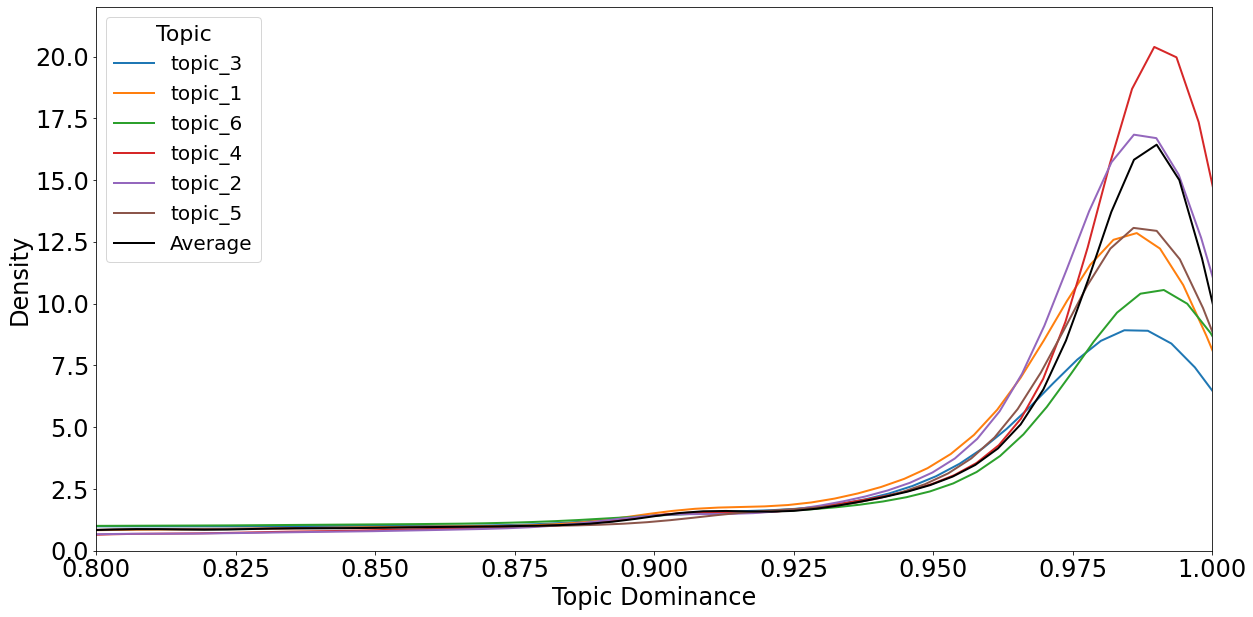

In [88]:
# !pip install seaborn
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,10))

a = final_df_renamed_cols.groupby('lda_dominant')

# Iterate through the five topics
topics = [topic for topic in final_df_renamed_cols['lda_dominant'].unique() if isinstance(topic, str)]

for topic in topics:
    b = a['lda_dominant_score'].get_group(topic)

    #     b.plot.density(color='green')
    # plt.title('Density plot for Speeding')
    # plt.show()

    sns.distplot(b, hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = topic)
    
# Plot formatting
sns.distplot(final_df_renamed_cols['lda_dominant_score'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 color = 'black',
                 label = 'Average')

plt.legend(prop={'size': 20}, title = 'Topic', title_fontsize=22)
# plt.title('Score Density of the dominant topics grouped by topic', fontsize=24)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.xlabel('Topic Dominance')
plt.ylim(0, 22)
plt.xlim(0.8, 1)
plt.ylabel('Density')

# EXTRAS

## Training Multiple LDA Models

In [ ]:
TOPIC_SELECTION = range(2,21, 1)
list(TOPIC_SELECTION)


%%time

paragraphs = result.merged_POS
# MIN_DF = 0.1
# MAX_DF = 0.8

# Vectorization
# dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

models = compare_lda_models(OUTPUT_DIR='../../../../../data/clean/lda_models/50k_paragraphs/', TOPIC_SELECTION=TOPIC_SELECTION,
                LEMMATIZED_TEXT=paragraphs, DICTIONARY=dictionary, CORPUS=corpus, MIN_DF=MIN_DF, MAX_DF=MAX_DF, N_ITERATIONS=1000,
                PATH_TO_MALLET=r'C:/mallet/bin/mallet.bat', GET_COHERENCE_SCORE=True, COHERENCE='c_v')

## Load Multiple LDA Models